In [2]:
# Import the os module
import os

#install requirements 
#!pip install -r requirements.txt

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Print the type of the returned object
print("os.getcwd() returns an object of type: {0}".format(type(cwd)))

Current working directory: /Users/hannahshlesinger/Desktop/DIGHUM101-2021-main/Final Project
os.getcwd() returns an object of type: <class 'str'>


In [3]:
os.chdir("goodreads-scraper-master")

In [4]:
ls

Data/                               most_common_reviews_df.csv
How-To-Use-Goodreads-Scraper.ipynb* most_popular_classics.txt*
LICENSE*                            requirements.txt*
README.md*                          rupi_kaur.txt
all_goodreads_reviews.csv           rupi_kaur_metadata/
classic_book_metadata/              rupi_kaur_reviews/
geckodriver.log                     sample.pdf
get_books.py*                       save_as_a_png.png
get_reviews.py*                     test_book_ids.txt*
goodreads_classics.txt*             test_scripts.sh*
goodreads_classics_sample.txt*      user_ratings.png
goodreads_reviews_df.png


In [5]:
!cat rupi_kaur.txt

23513349.milk-and-honey
35606560.the-sun-and-her-flowers
49656780.home-body

In [6]:
!mkdir rupi_kaur_metadata

mkdir: rupi_kaur_metadata: File exists


In [7]:
!python get_books.py --book_ids_path rupi_kaur.txt --output_directory_path rupi_kaur_metadata --format csv

2021-06-30 11:27:59.494786 get_books.py:

🎉 Success! All book metadata scraped. 🎉

Metadata files have been output to /rupi_kaur_metadata
Goodreads scraping run time = ⏰ 0:00:00.040338 ⏰


In [8]:
import pandas as pd

In [9]:
metadata = pd.read_csv("rupi_kaur_metadata/all_books.csv")
metadata

,book_id_title,book_id,book_title,book_series,book_series_uri,isbn,isbn13,year_first_published,author,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution
0,35606560.the-sun-and-her-flowers,35606560,The Sun and Her Flowers,NaN,NaN,6070751981,9786070751981,NaN,Rupi Kaur,256,"['Poetry', 'Feminism', 'Nonfiction', 'Adult', ...","{'to-read': 222172, 'currently-reading': 16427...","{'Varied': 348, 'What': 164, 'Best': 0, 'Books...",182614,12227,4.14,"{'5 Stars': 86784, '4 Stars': 53573, '3 Stars'..."
1,49656780.home-body,49656780,Home Body,NaN,NaN,1449486800,9781449486808,NaN,Rupi Kaur,192,"['Poetry', 'Feminism', 'Nonfiction', 'Adult', ...","{'to-read': 37144, 'currently-reading': 2446, ...","{'Popsugar': 32, 'What': 202, 'Home': 51, 'Bes...",31381,3625,4.09,"{'5 Stars': 13334, '4 Stars': 10176, '3 Stars'..."
2,23513349.milk-and-honey,23513349,Milk and Honey,NaN,NaN,8467049022,9781449474256,NaN,Rupi Kaur,204,"['Poetry', 'Feminism', 'Nonfiction', 'Contempo...","{'to-read': 360785, 'currently-reading': 27695...","{'Varied': 348, 'Best': 106, 'What': 38, 'Poet...",413398,31127,4.05,"{'5 Stars': 194052, '4 Stars': 108756, '3 Star..."


In [10]:
metadata.index

RangeIndex(start=0, stop=3, step=1)

<AxesSubplot:ylabel='book_title'>

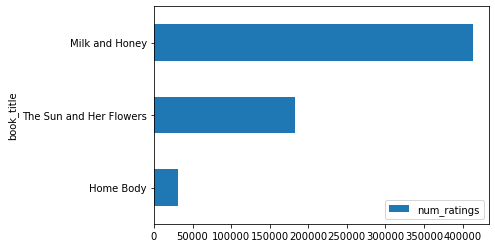

In [10]:
metadata.sort_values(by='num_ratings').plot(x='book_title', y='num_ratings', kind='barh')

In [11]:
!mkdir rupi_kaur_reviews

mkdir: rupi_kaur_reviews: File exists


In [12]:
!python get_reviews.py --book_ids_path rupi_kaur.txt \
--output_directory_path rupi_kaur_reviews --sort_order default --browser firefox

2021-06-20 18:31:55.387898 get_reviews.py: Scraping 23513349.milk-and-honey...
2021-06-20 18:31:55.387964 get_reviews.py: #1 out of 3 books
Scraped page 1
🚨 ElementClickInterceptedException (Likely a pop-up)🚨
🔄 Refreshing Goodreads site and rescraping book🔄
Scraped page 1
Scraped page 2
Scraped page 3
🚨 ElementClickInterceptedException (Likely a pop-up)🚨
🔄 Refreshing Goodreads site and skipping problem page 4🔄
Scraped page 5
🚨 ElementClickInterceptedException (Likely a pop-up)🚨
🔄 Refreshing Goodreads site and skipping problem page 6🔄
Scraped page 7
Scraped page 8
🚨 ElementClickInterceptedException (Likely a pop-up)🚨
🔄 Refreshing Goodreads site and skipping problem page 9🔄
🚨 ElementClickInterceptedException (Likely a pop-up)🚨
🔄 Refreshing Goodreads site and skipping problem page 10🔄
2021-06-20 18:33:16.322603 get_reviews.py: Scraped ✨180✨ reviews for 23513349.milk-and-honey
2021-06-20 18:33:16.329321 get_reviews.py: Scraping 35606560.the-sun-and-her-flowers...
2021-06-20 18:33:16.329336

In [13]:
reviews_df = pd.read_json('rupi_kaur_reviews/all_reviews.json')
reviews_df

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves
0,35606560.the-sun-and-her-flowers,35606560,The Sun and Her Flowers,https://www.goodreads.com/review/show/2142763598,2142763598,2017-10-03,1,Megan,/user/show/72149944-megan,"I don't know where to begin. Listen, as a brow...",1664,default,[]
1,35606560.the-sun-and-her-flowers,35606560,The Sun and Her Flowers,https://www.goodreads.com/review/show/2152685049,2152685049,2017-10-14,3,Hailey (Hailey in Bookland),/user/show/21937982-hailey-hailey-in-bookland,*Thank you so much to Indigo for surprising me...,398,default,[]
2,35606560.the-sun-and-her-flowers,35606560,The Sun and Her Flowers,https://www.goodreads.com/review/show/2156632396,2156632396,2017-10-22,4,Julia Miller,/user/show/72672216-julia-miller,"Rupi, you have my heart ❤️ beautifully written...",276,default,[]
3,35606560.the-sun-and-her-flowers,35606560,The Sun and Her Flowers,https://www.goodreads.com/review/show/2179343255,2179343255,2017-11-09,1,Brittney Andrews (beabookworm),/user/show/36960689-brittney-andrews-beabookworm,This review was brought to you by the best Rea...,266,default,"[poetry, this-makes-nickelback-sound-good]"
4,35606560.the-sun-and-her-flowers,35606560,The Sun and Her Flowers,https://www.goodreads.com/review/show/2736305347,2736305347,2019-05-19,2,JV (semi-hiatus),/user/show/20906165-jv-semi-hiatus,"Once, there were these poems,Which my heart ca...",236,default,"[2019, poetry, feminism]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,23513349.milk-and-honey,23513349,Milk and Honey,https://www.goodreads.com/review/show/1630861493,1630861493,2016-05-06,5,Tori (InToriLex),/user/show/10584748-tori-intorilex,Find this and other Reviews at In Tori LexThis...,17,default,"[feminist-themes, poetry, favorite, giveawaywi..."
626,23513349.milk-and-honey,23513349,Milk and Honey,https://www.goodreads.com/review/show/1756611573,1756611573,2016-09-13,4,Marnie,/user/show/33816538-marnie,"Rupi Kaur is unapologetically honest, and that...",17,default,[]
627,23513349.milk-and-honey,23513349,Milk and Honey,https://www.goodreads.com/review/show/1890979297,1890979297,2017-01-24,1,Andjela,/user/show/14293227-andjela,"""... i was not made with a fire in my belly so...",17,default,[]
628,23513349.milk-and-honey,23513349,Milk and Honey,https://www.goodreads.com/review/show/2183480525,2183480525,2017-11-13,3,Samantha,/user/show/73741257-samantha,This book of poetry was amazingly written. The...,17,default,"[owned, 3-stars, poetry]"


In [14]:
reviews_df['book_title'].value_counts()

Home Body                  300
Milk and Honey             180
The Sun and Her Flowers    150
Name: book_title, dtype: int64

In [15]:
len(reviews_df)

630

In [16]:
len(reviews_df[reviews_df[['book_title','text', 'user_name', 'user_url']].duplicated(keep=False)])

0

In [17]:
reviews_df.to_csv("all_goodreads_reviews.csv", encoding ='utf-8', index=False)